In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import matplotlib

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0,10.0)

In [3]:
np.random.seed(5)
X, y = sklearn.datasets.make_moons(200,noise=0.20)

In [4]:
print(X[0:3])
print(y[0:3])

[[ 0.12460094 -0.09920708]
 [-0.85988759  0.73037763]
 [ 1.05700765 -0.60013727]]
[1 0 1]


In [5]:
print(X.shape)
print(y.shape)

(200, 2)
(200,)


In [6]:
# Function to plot decision boundary
def plot_decision_boundary(pred_func): 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 
    h = 0.01 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 

    Z = pred_func(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) 

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral) 
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral) 


In [7]:
train_length = len(X)
input_dim = 2
output_dim = 2
epsilon = 0.01
lambda_reg = 0.01 # for regularisation

In [8]:
def loss(model):
    w1, b1, w2, b2 = model['w1'],model['b1'],model['w2'], model['b2']
    z1 = X.dot(w1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    scores = np.exp(z2)
    prob = scores / np.sum(scores, axis=1,keepdims=True)
    true_logprob = -np.log(prob[range(train_length),y])
    data_loss = np.sum(true_logprob)
    # regularization term
    data_loss += lambda_reg/2 * (np.sum(np.square(w1)) + np.sum(np.square(w2))) 
    
    return 1./train_length * data_loss

In [9]:
def predict(model,x):
    w1, b1, w2, b2 = model['w1'], model['b1'], model['w2'],model['b2']
    z1 = x.dot(w1) + b1 
    a1 = np.tanh(z1) 
    z2 = a1.dot(w2) + b2 
    exp_scores = np.exp(z2) 
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 
    return np.argmax(probs, axis=1) 

In [10]:
def build_model(nn_hdim,print_loss=False): 
# Parameters initialized to random values.. these are learnt
    np.random.seed(0) 
    W1 = np.random.randn(input_dim, nn_hdim) / np.sqrt(input_dim) 
    b1 = np.zeros((1, nn_hdim)) 
    W2 = np.random.randn(nn_hdim, output_dim) / np.sqrt(nn_hdim) 
    b2 = np.zeros((1, output_dim)) 

    model = {} 
# Gradient descent. For each batch... 
    for i in range(0, 200000): 
    # Forward propagation 
            z1 = X.dot(W1) + b1 
            a1 = np.tanh(z1) 
            z2 = a1.dot(W2) + b2 
            exp_scores = np.exp(z2) 
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 
    # Backprop
            delta3 = probs 
            delta3[range(train_length), y] -= 1 
            dW2 = (a1.T).dot(delta3) 
            db2 = np.sum(delta3, axis=0, keepdims=True) 
            delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2)) 
            dW1 = np.dot(X.T, delta2) 
            db1 = np.sum(delta2, axis=0) 
    # Regularization terms 
            dW2 += lambda_reg * W2 
            dW1 += lambda_reg * W1 
    # Update
            W1 += -epsilon * dW1 
            b1 += -epsilon * db1 
            W2 += -epsilon * dW2 
            b2 += -epsilon * db2 

            model = { 'w1': W1, 'b1': b1, 'w2': W2, 'b2': b2} 

            if print_loss and i % 1000 == 0: 
                print("Loss after iteration %i: %f" %(i, loss(model))) 
    
    return model 

In [11]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)

Loss after iteration 0: 0.421267
Loss after iteration 1000: 0.090569
Loss after iteration 2000: 0.090036
Loss after iteration 3000: 0.089890
Loss after iteration 4000: 0.089842
Loss after iteration 5000: 0.089822
Loss after iteration 6000: 0.089814
Loss after iteration 7000: 0.089810
Loss after iteration 8000: 0.089808
Loss after iteration 9000: 0.089807
Loss after iteration 10000: 0.089806
Loss after iteration 11000: 0.089806
Loss after iteration 12000: 0.089806
Loss after iteration 13000: 0.089806
Loss after iteration 14000: 0.089806
Loss after iteration 15000: 0.089806
Loss after iteration 16000: 0.089806
Loss after iteration 17000: 0.089806
Loss after iteration 18000: 0.089806
Loss after iteration 19000: 0.089806
Loss after iteration 20000: 0.089806
Loss after iteration 21000: 0.089806
Loss after iteration 22000: 0.089806
Loss after iteration 23000: 0.089805
Loss after iteration 24000: 0.089805
Loss after iteration 25000: 0.089805
Loss after iteration 26000: 0.089805
Loss after ite

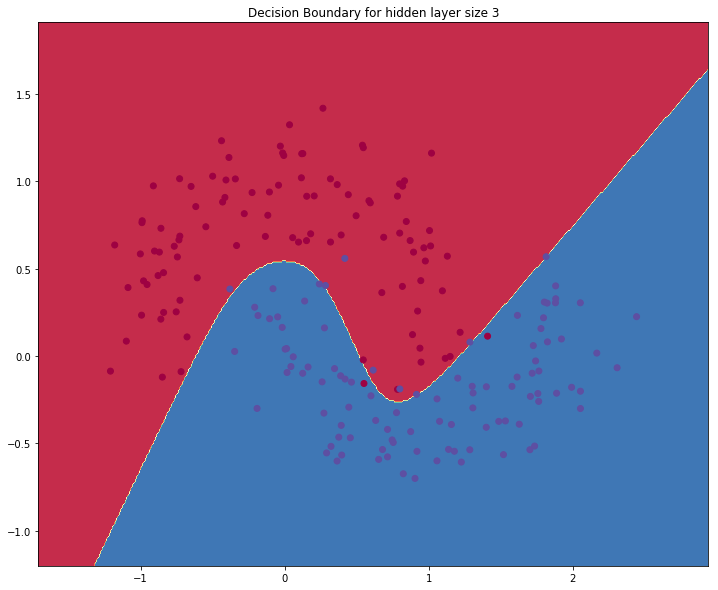

In [12]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer of size 3")